In [231]:
def print_details(dataset_df):
    total_cols = dataset_df.columns

    print(f"{'Column':<15} {'Empty':<10} {'Non-Empty':<10}")
    print("-" * 35)
    for col in total_cols:
        empty = dataset_df[col].isnull().sum()
        non_empty = dataset_df[col].notnull().sum()
        print(f"{col:<15} {empty:<10} {non_empty:<10}")

Importing the necessary libraries:

- `tensorflow_decision_forests` for the Random Forest model
- `pandas` for data manipulation
- `numpy` for numerical operations
- `matplotlib` for plotting data
- `RobustScaler` from `sklearn.preprocessing` of package `scikit-learn` for scaling the data

Also, matplotlib is set to use the `seaborn-whitegrid` style and inline

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler
import xgboost as xgb

%matplotlib inline
plt.style.use('seaborn-v0_8')

For pandas, we set the following options:

- `max_colwidth` to `200`
- `display.width` to `200`
- `display.max_columns` to `500`
- `display.max_rows` to `1000`

In [233]:
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

We define the file paths for the training and test datasets.

In [234]:
# train_file_path = "/kaggle/input/house-prices-advanced-regression-techniques/train.csv"
# test_file_path = "/kaggle/input/house-prices-advanced-regression-techniques/test.csv"

train_file_path = "data/train.csv"
test_file_path = "data/test.csv"

Now, we use `pandas` to read both the datasets.

In [235]:
train_pd = pd.read_csv(train_file_path)
test_pd = pd.read_csv(test_file_path)

Now, lets plot the distribution of `SalePrice` and `GrLivArea` columns in the training dataset.

(0.0, 800000.0)

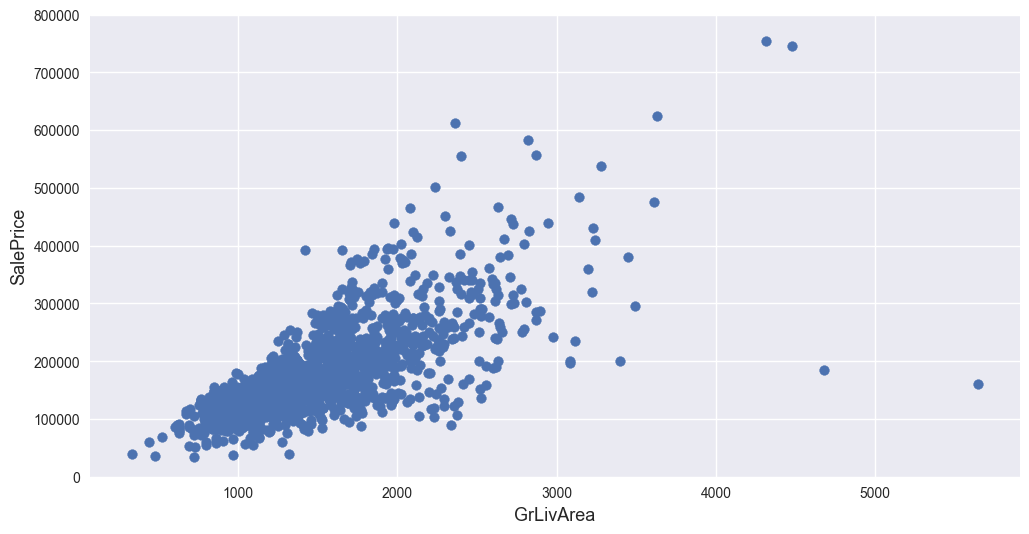

In [236]:
plt.figure(figsize=(12, 6))
plt.scatter(x=train_pd.GrLivArea, y=train_pd.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0, 800000)

Here, we can see the `GrLivArea` has outliers where the value is greater than `4000` and the `SalePrice` is less than `300000`.

So, we remove these outliers from the dataset.

This is because these outliers can affect the model's performance.

In [237]:
train_pd.drop(
    train_pd[(train_pd["GrLivArea"] > 4000) & (train_pd["SalePrice"] < 300000)].index,
    inplace=True)

Now, we concatenate the training and test datasets into a single dataset.

This is done to ensure that the preprocessing steps are applied to both datasets.

Also, we drop the `Id` column from the dataset since it is not needed for training the model.

In [238]:
dataset_df = train_pd
dataset_df.drop('Id', axis=1, inplace=True)

For Data cleaning and preprocessing, we fill the missing values in the dataset.

We first populate the missing values in the dataset.

Now, the missing values are filled according to the data description.

In [239]:
area_cols = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in area_cols:
    dataset_df[col].fillna(0, inplace=True)

/var/folders/_8/s86gthys1d7dsy7_0r3l3f_m0000gn/T/ipykernel_24138/1906549421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df[col].fillna(0, inplace=True)


In [240]:
feature_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
                "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
                "MasVnrType"]
for col in feature_cols:
    dataset_df[col].fillna("None", inplace=True)

/var/folders/_8/s86gthys1d7dsy7_0r3l3f_m0000gn/T/ipykernel_24138/1933544119.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df[col].fillna("None", inplace=True)
/var/folders/_8/s86gthys1d7dsy7_0r3l3f_m0000gn/T/ipykernel_24138/1933544119.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset_df[col].fillna("None", inplace=True)


In [241]:
other_cols = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual",
              "SaleType", "Exterior1st", "Exterior2nd"]
for col in other_cols:
    dataset_df[col].fillna(dataset_df[col].mode()[0], inplace=True)

/var/folders/_8/s86gthys1d7dsy7_0r3l3f_m0000gn/T/ipykernel_24138/468387777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df[col].fillna(dataset_df[col].mode()[0], inplace=True)
/var/folders/_8/s86gthys1d7dsy7_0r3l3f_m0000gn/T/ipykernel_24138/468387777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

For feature engineering, we convert some numerical columns to categorical columns.

In [242]:
number_cols = ["MSSubClass", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "MoSold",
               "YrSold", "YearBuilt", "YearRemodAdd", "LowQualFinSF", "GarageYrBlt"]
for col in number_cols:
    dataset_df[col] = dataset_df[col].astype(str)

Now we map the categorical columns to numerical values.

This is done using the `map` function.

In [243]:
def map_values(dataset):
    dataset["oMSSubClass"] = dataset.MSSubClass.map({'180': 1,
                                                     '30': 2, '45': 2,
                                                     '190': 3, '50': 3, '90': 3,
                                                     '85': 4, '40': 4, '160': 4,
                                                     '70': 5, '20': 5, '75': 5, '80': 5, '150': 5,
                                                     '120': 6, '60': 6})

    dataset["oMSZoning"] = dataset.MSZoning.map({'C (all)': 1, 'RH': 2, 'RM': 2, 'RL': 3, 'FV': 4})

    dataset["oNeighborhood"] = dataset.Neighborhood.map({'MeadowV': 1,
                                                         'IDOTRR': 2, 'BrDale': 2,
                                                         'OldTown': 3, 'Edwards': 3, 'BrkSide': 3,
                                                         'Sawyer': 4, 'Blueste': 4, 'SWISU': 4, 'NAmes': 4,
                                                         'NPkVill': 5, 'Mitchel': 5,
                                                         'SawyerW': 6, 'Gilbert': 6, 'NWAmes': 6,
                                                         'Blmngtn': 7, 'CollgCr': 7, 'ClearCr': 7, 'Crawfor': 7,
                                                         'Veenker': 8, 'Somerst': 8, 'Timber': 8,
                                                         'StoneBr': 9,
                                                         'NoRidge': 10, 'NridgHt': 10})

    dataset["oCondition1"] = dataset.Condition1.map({'Artery': 1,
                                                     'Feedr': 2, 'RRAe': 2,
                                                     'Norm': 3, 'RRAn': 3,
                                                     'PosN': 4, 'RRNe': 4,
                                                     'PosA': 5, 'RRNn': 5})

    dataset["oBldgType"] = dataset.BldgType.map({'2fmCon': 1, 'Duplex': 1, 'Twnhs': 1, '1Fam': 2, 'TwnhsE': 2})

    dataset["oHouseStyle"] = dataset.HouseStyle.map({'1.5Unf': 1,
                                                     '1.5Fin': 2, '2.5Unf': 2, 'SFoyer': 2,
                                                     '1Story': 3, 'SLvl': 3,
                                                     '2Story': 4, '2.5Fin': 4})

    dataset["oExterior1st"] = dataset.Exterior1st.map({'BrkComm': 1,
                                                       'AsphShn': 2, 'CBlock': 2, 'AsbShng': 2,
                                                       'WdShing': 3, 'Wd Sdng': 3, 'MetalSd': 3, 'Stucco': 3,
                                                       'HdBoard': 3,
                                                       'BrkFace': 4, 'Plywood': 4,
                                                       'VinylSd': 5,
                                                       'CemntBd': 6,
                                                       'Stone': 7, 'ImStucc': 7})

    dataset["oMasVnrType"] = dataset.MasVnrType.map({'BrkCmn': 1, 'None': 1, 'BrkFace': 2, 'Stone': 3})

    dataset["oExterQual"] = dataset.ExterQual.map({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

    dataset["oFoundation"] = dataset.Foundation.map({'Slab': 1,
                                                     'BrkTil': 2, 'CBlock': 2, 'Stone': 2,
                                                     'Wood': 3, 'PConc': 4})

    dataset["oBsmtQual"] = dataset.BsmtQual.map({'Fa': 2, 'None': 1, 'TA': 3, 'Gd': 4, 'Ex': 5})

    dataset["oBsmtExposure"] = dataset.BsmtExposure.map({'None': 1, 'No': 2, 'Av': 3, 'Mn': 3, 'Gd': 4})

    dataset["oHeating"] = dataset.Heating.map({'Floor': 1, 'Grav': 1, 'Wall': 2, 'OthW': 3, 'GasW': 4, 'GasA': 5})

    dataset["oHeatingQC"] = dataset.HeatingQC.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

    dataset["oKitchenQual"] = dataset.KitchenQual.map({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

    dataset["oFunctional"] = dataset.Functional.map(
        {'Maj2': 1, 'Maj1': 2, 'Min1': 2, 'Min2': 2, 'Mod': 2, 'Sev': 2, 'Typ': 3})

    dataset["oFireplaceQu"] = dataset.FireplaceQu.map({'None': 1, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

    dataset["oGarageType"] = dataset.GarageType.map({'CarPort': 1, 'None': 1,
                                                     'Detchd': 2,
                                                     '2Types': 3, 'Basment': 3,
                                                     'Attchd': 4, 'BuiltIn': 5})

    dataset["oGarageFinish"] = dataset.GarageFinish.map({'None': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4})

    dataset["oPavedDrive"] = dataset.PavedDrive.map({'N': 1, 'P': 2, 'Y': 3})

    dataset["oSaleType"] = dataset.SaleType.map({'COD': 1, 'ConLD': 1, 'ConLI': 1, 'ConLw': 1, 'Oth': 1, 'WD': 1,
                                                 'CWD': 2, 'Con': 3, 'New': 3})

    dataset["oSaleCondition"] = dataset.SaleCondition.map(
        {'AdjLand': 1, 'Abnorml': 2, 'Alloca': 2, 'Family': 2, 'Normal': 3, 'Partial': 4})

    return dataset


dataset_df = map_values(dataset_df)

Now, we list the columns that have empty values. For each column, we print the number of empty values and non-empty values.

Then, we split the dataset into training and validation sets using a `split_dataset` function.

The ratio of the test set is set to `0.30`.

In [244]:
def split_dataset(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]


train_ds_pd, valid_ds_pd = split_dataset(dataset_df)

print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1008 examples in training, 450 examples in testing.


The label column is set to `SalePrice` since it is the target column.

In [245]:
label = 'SalePrice'

Now, we convert the `pandas` dataframes to `tf.data.Dataset` objects.

The `tfdf.keras.pd_dataframe_to_tf_dataset` function is used for this purpose.

In [246]:
print(train_ds_pd["MSZoning"])

1       RL
2       RL
3       RL
5       RL
6       RL
        ..
1453    RL
1454    FV
1455    RL
1457    RL
1458    RL
Name: MSZoning, Length: 1008, dtype: object


In [247]:
scaler = RobustScaler()

X_scaled = scaler.fit_transform(train_ds_pd.drop('SalePrice', axis=1))
y_log = np.log1p(train_ds_pd['SalePrice'])

ValueError: could not convert string to float: 'RL'

In [ ]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
score = rmse_cv(xgb.XGBRegressor(), X_scaled, y_log)

In [ ]:
print(score)